In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import math

%matplotlib inline

### Linear Regression

In [2]:
sns.set()

In [36]:
x = np.array([1,2,2,3]).reshape(-1,1)
y = np.array([1,1,2,2])

In [37]:
model = LinearRegression().fit(x, y)

In [38]:
a0 = model.coef_
b0 = model.intercept_

In [6]:
print(a0[0], b0)

0.4999999999999999 0.5000000000000002


In [39]:
def func(a,b):
    return (1-a-b)**2 + (1-2*a-b)**2 + (2-2*a-b)**2 + (2-3*a-b)**2

In [40]:
def grad(a,b):
    return -2*(1-a-b) - 4*(1-2*a-b) - 4*(2-2*a-b) - 6*(2-3*a-b), -2*(1-a-b) - 2*(1-2*a-b) - 2*(2-2*a-b) - 2*(2-3*a-b)

In [41]:
def plotting(iteration, a, b):
    plt.figure(figsize=(8,6))
    x_1 = [1,2,2,3]
    y_1 = [1,1,2,2]
    plt.scatter(x_1,y_1,color='b')
    x = np.linspace(0, 4, 100)
    y=a*x+b
    plt.plot(x, y, linestyle='dashed', color='g')
    plt.plot(x, a0*x+b0, color='r')
    plt.legend(['$y=ax+b$', 'OLS regression', 'data'], loc='upper right')
    plt.xlim([0, 4])
    plt.ylim([0, 3])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Iteration {}'.format(iteration))
    plt.savefig('./img/it_{}.png'.format(iteration))

In [42]:
def GD(initial, alpha, diff):
    x_prev, y_prev = initial[0], initial[1]
    error = diff + 1
    n_iter = 0
    while error > diff:
        x_next, y_next = x_prev - alpha*grad(x_prev, y_prev)[0], y_prev - alpha*grad(x_prev, y_prev)[1]
        error = abs(func(x_next, y_next) - func(x_prev, y_prev))
        x_prev, y_prev = x_next, y_next
        n_iter += 1
        plotting(n_iter, a=x_next, b=y_next)
    return [x_prev, y_prev], func(x_prev, y_prev), n_iter

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Point of minimum:  (0.49, 0.53) 
Min =  0.5 
N iterations =  468


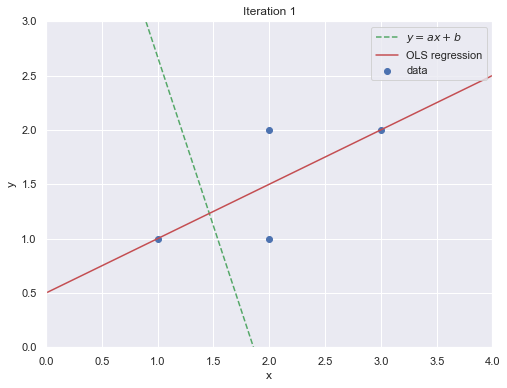

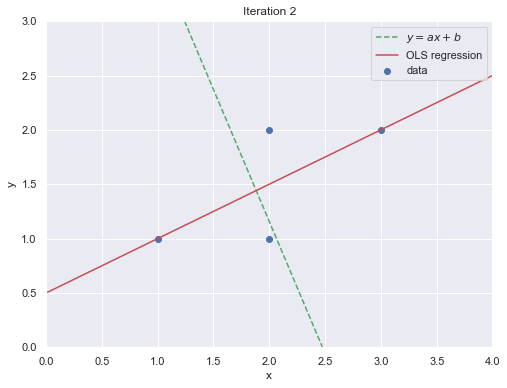

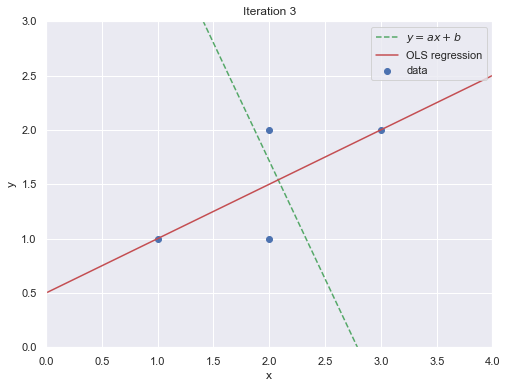

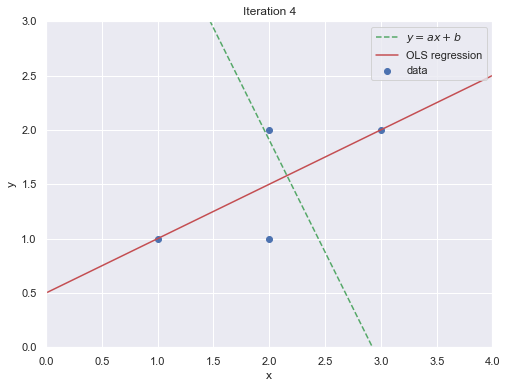

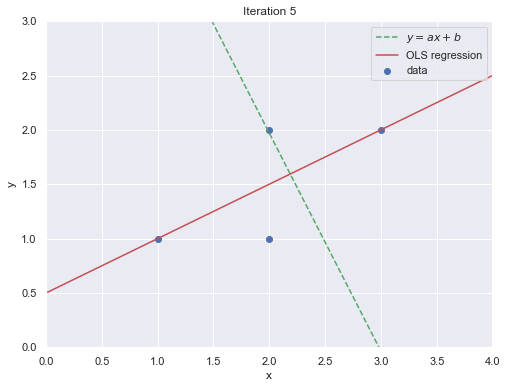

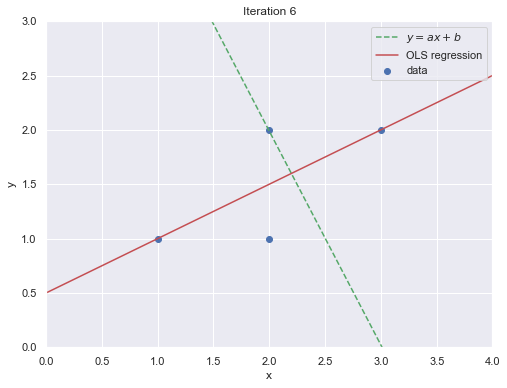

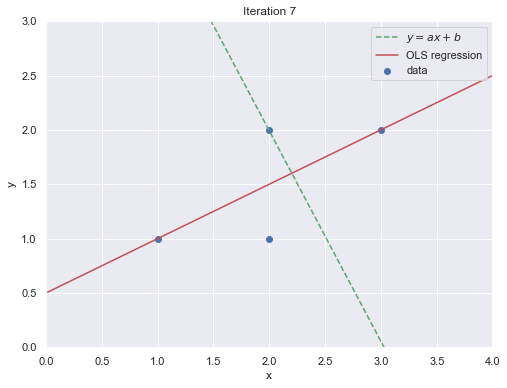

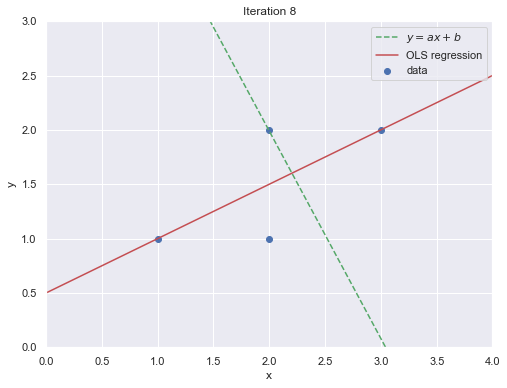

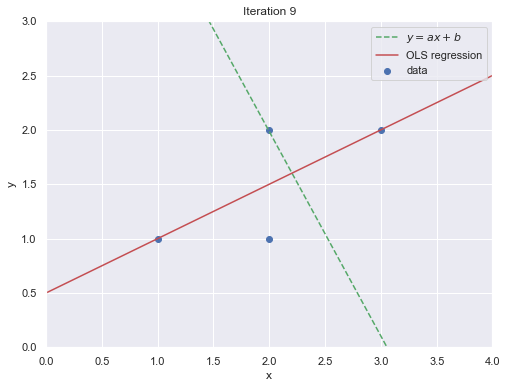

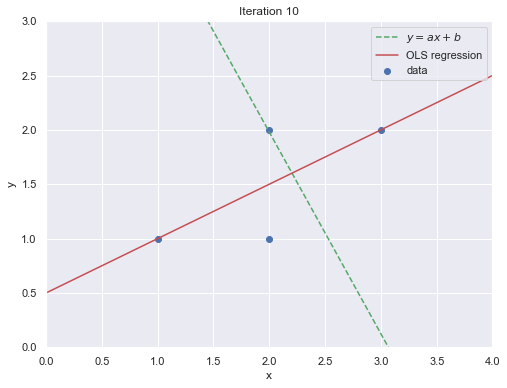

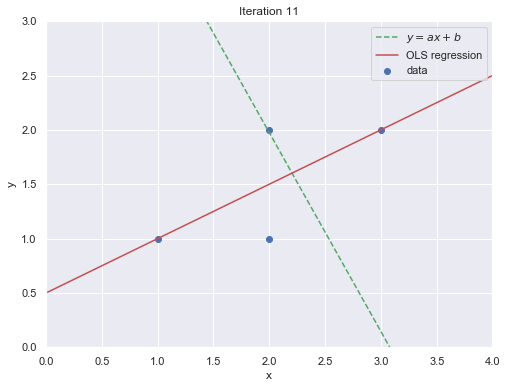

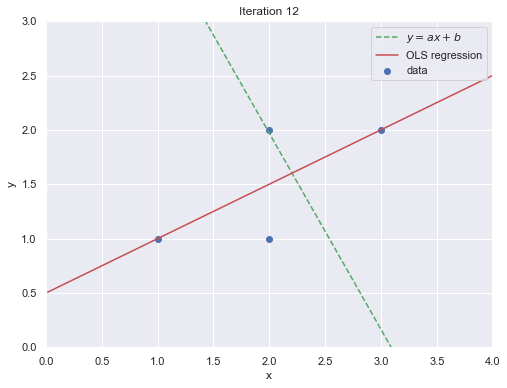

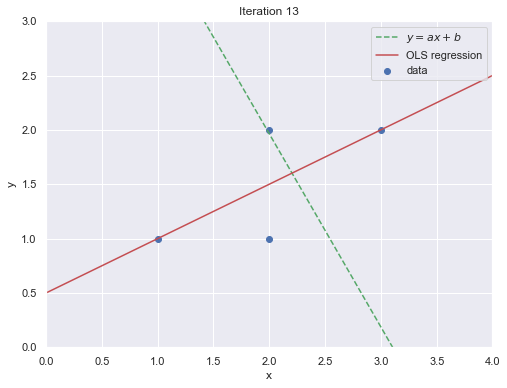

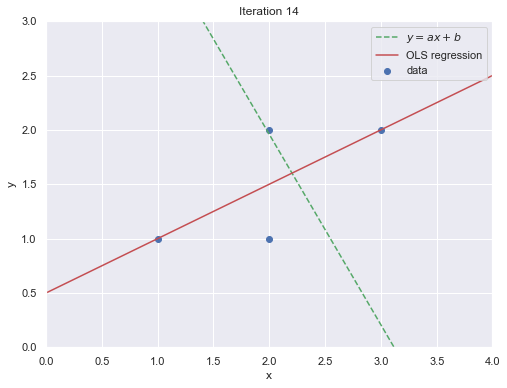

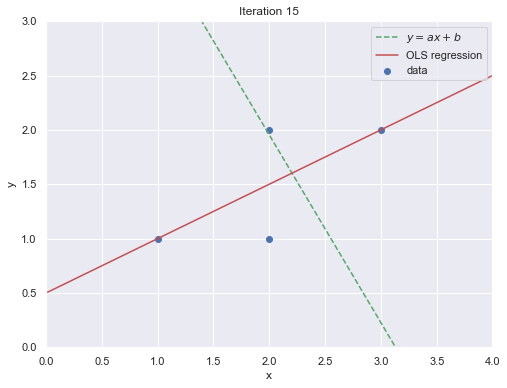

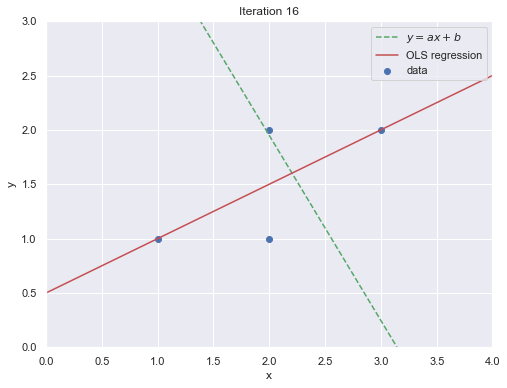

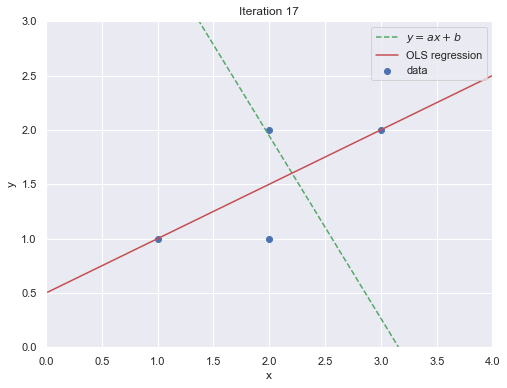

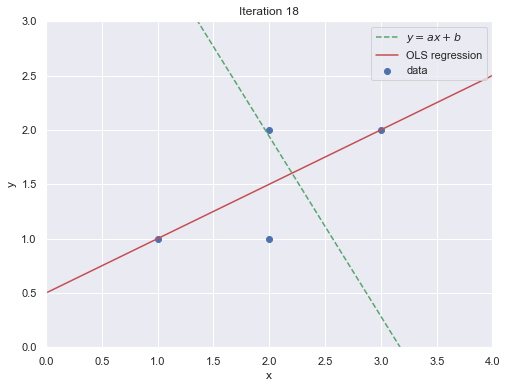

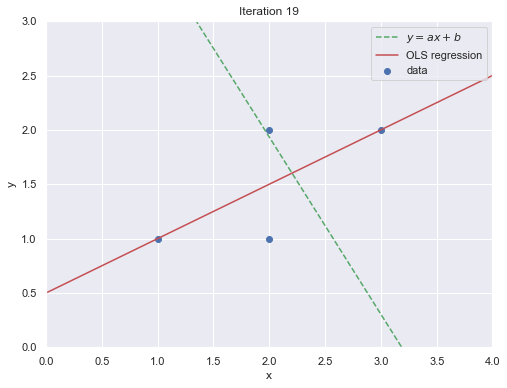

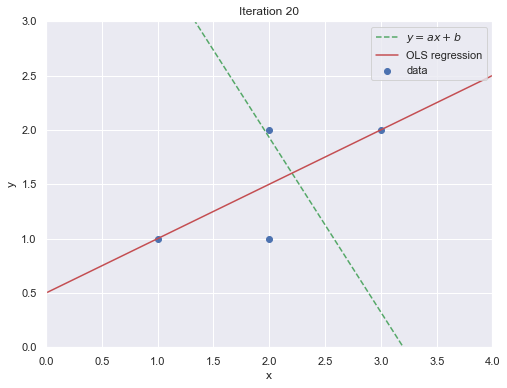

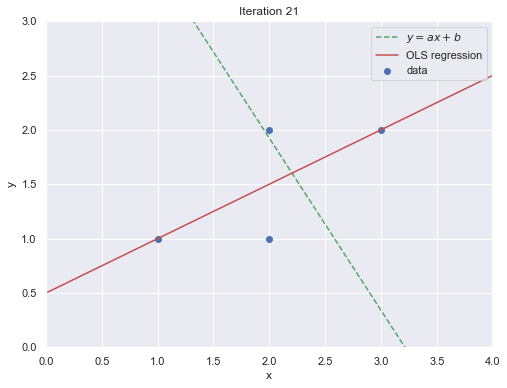

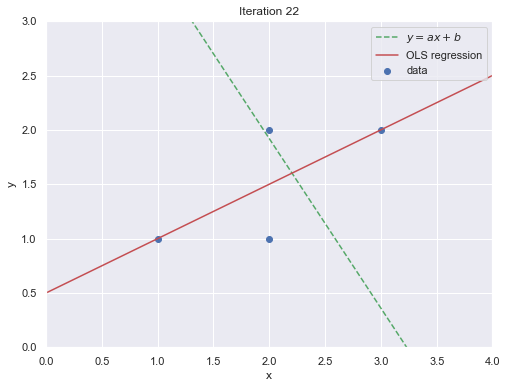

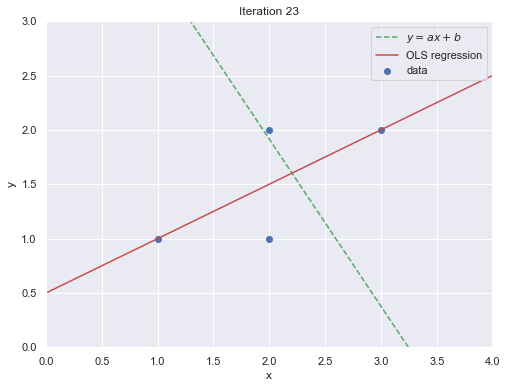

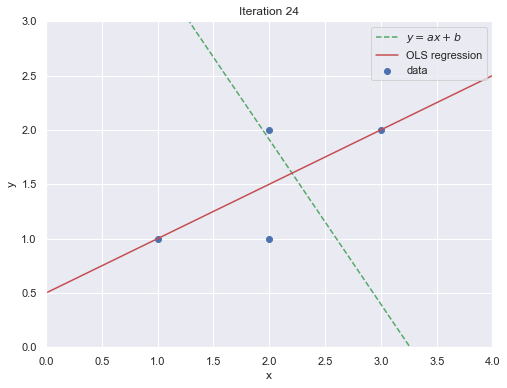

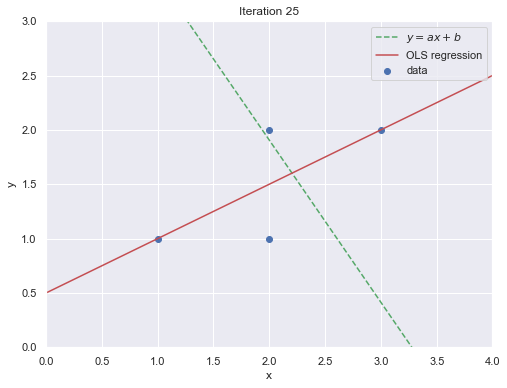

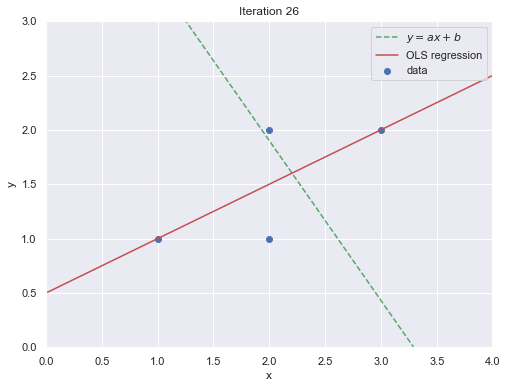

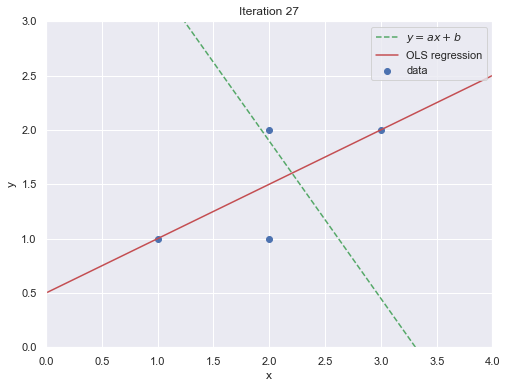

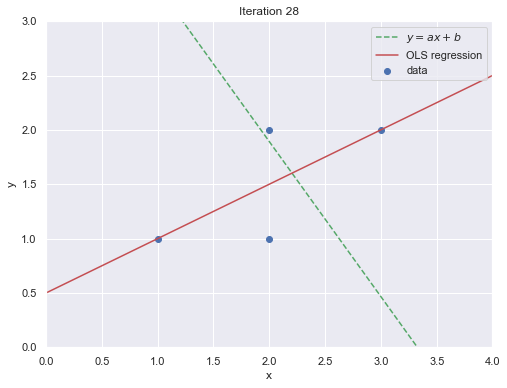

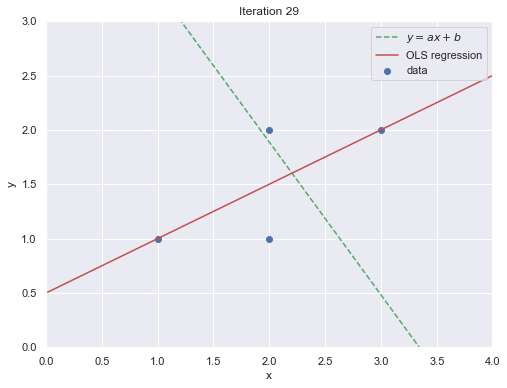

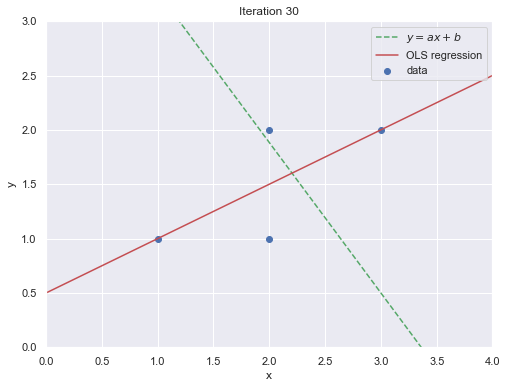

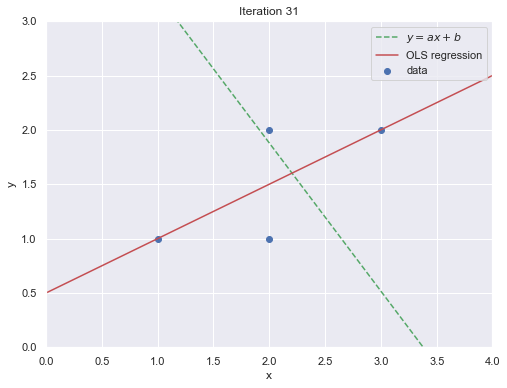

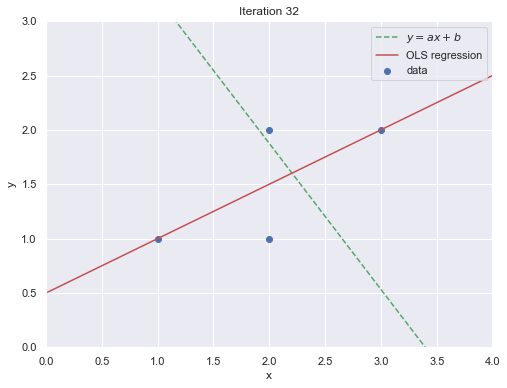

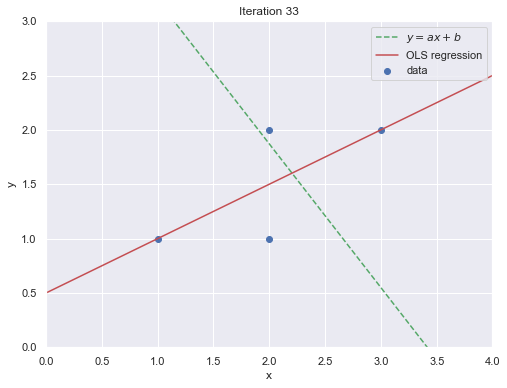

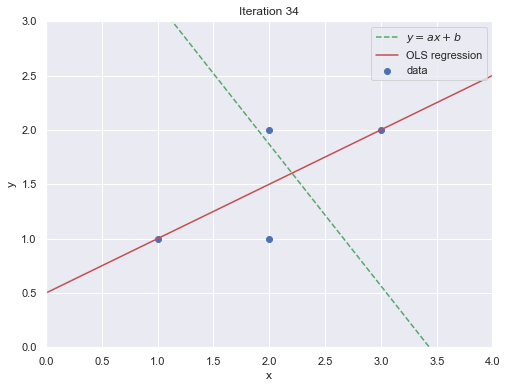

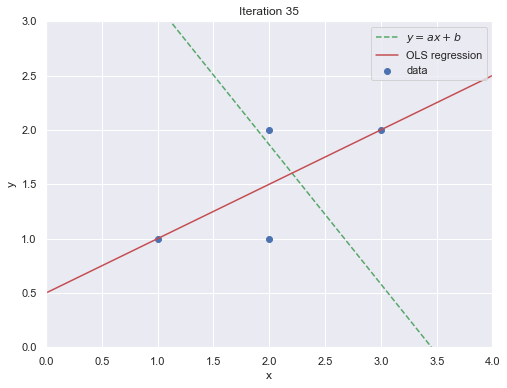

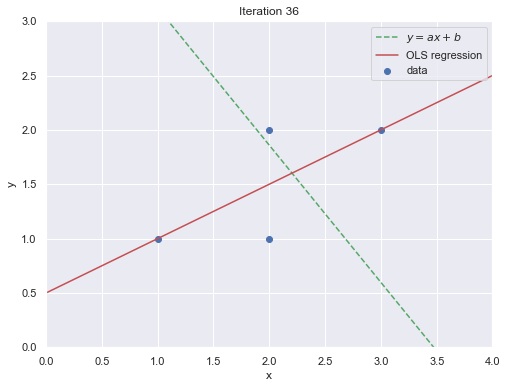

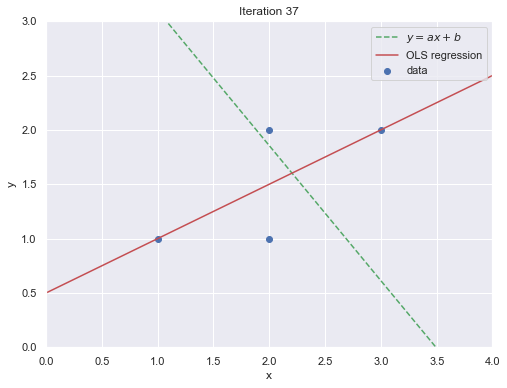

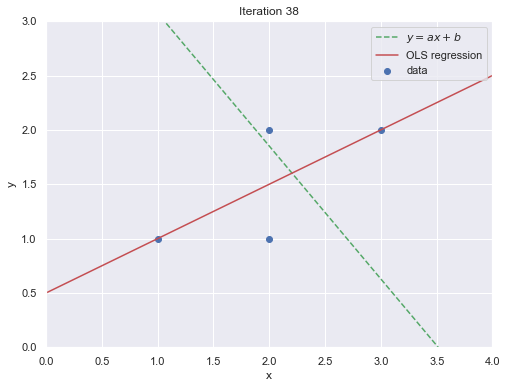

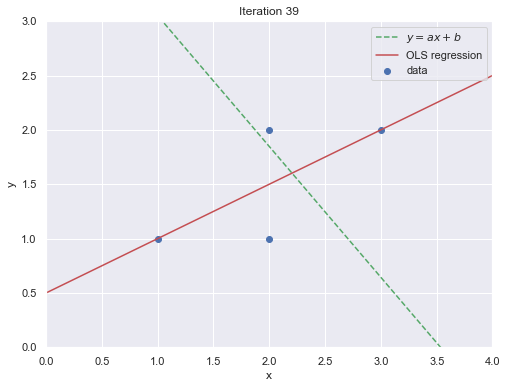

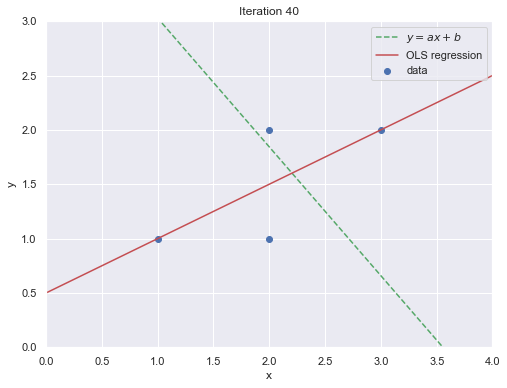

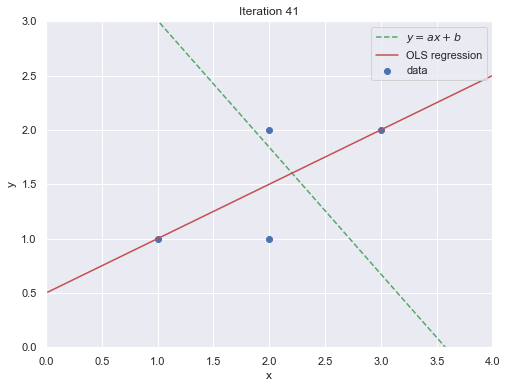

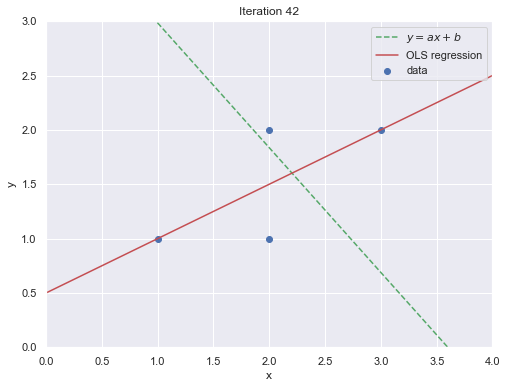

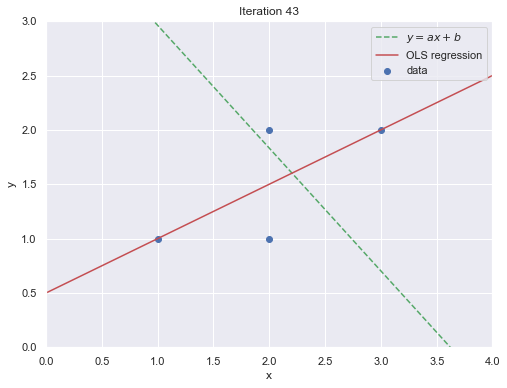

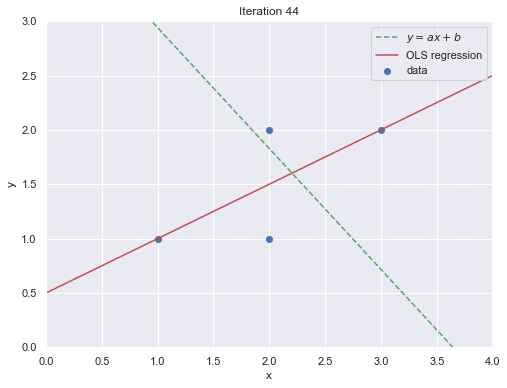

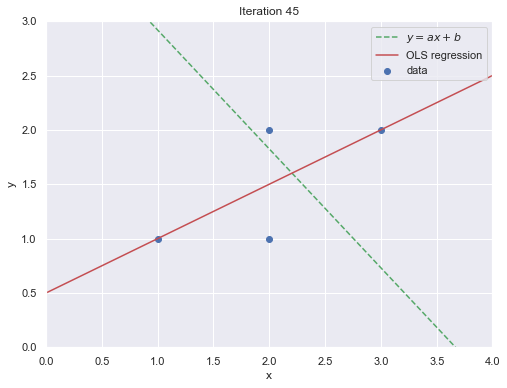

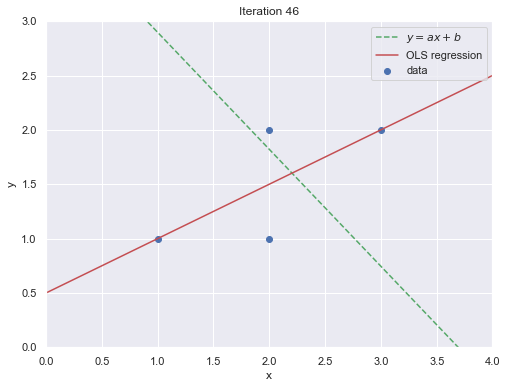

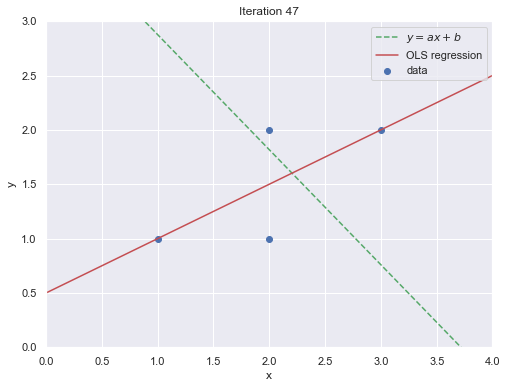

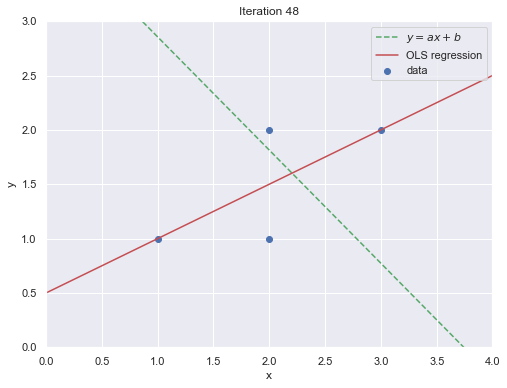

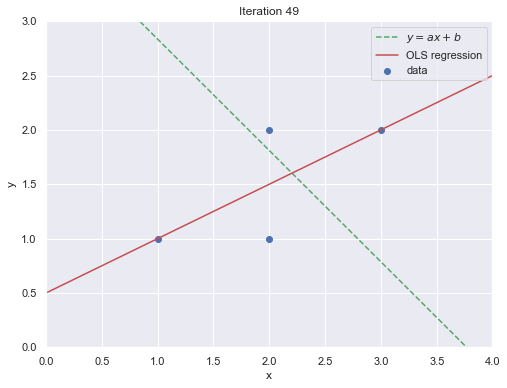

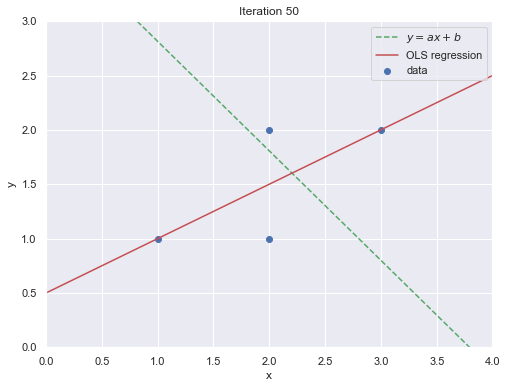

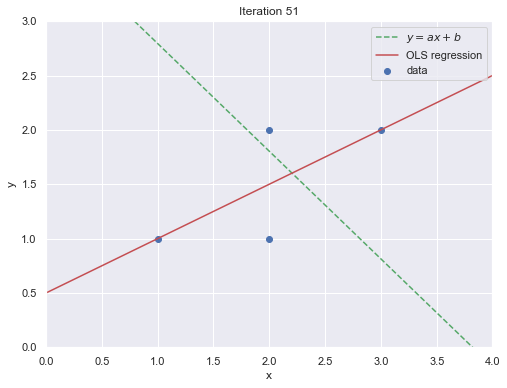

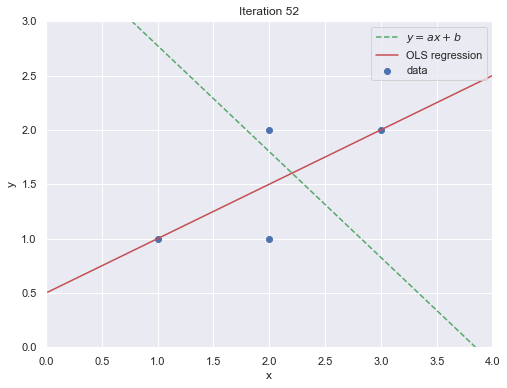

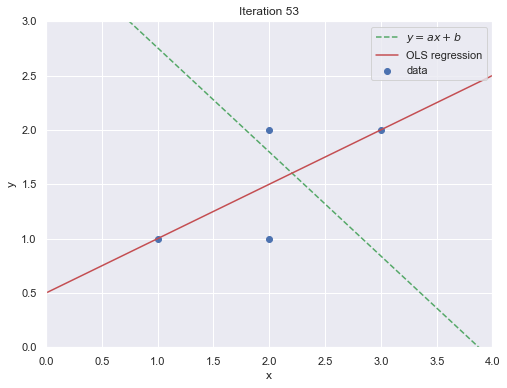

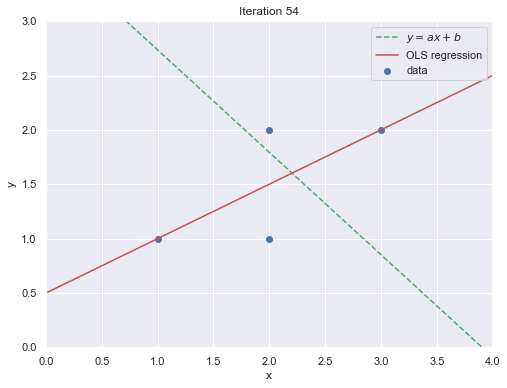

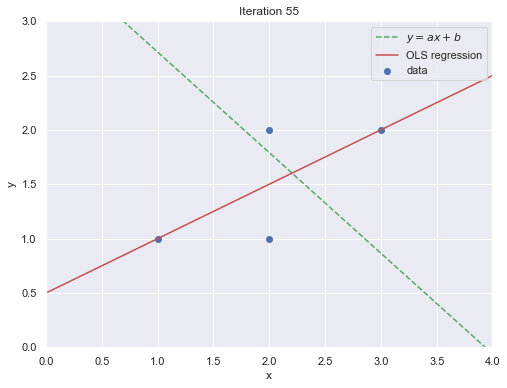

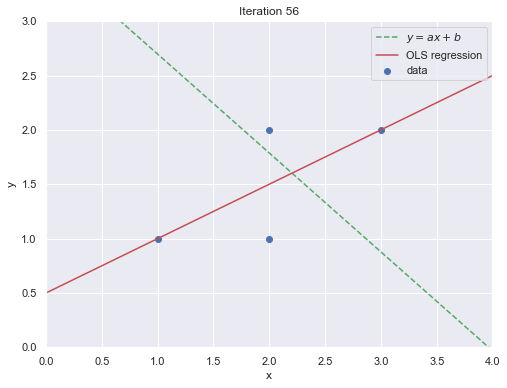

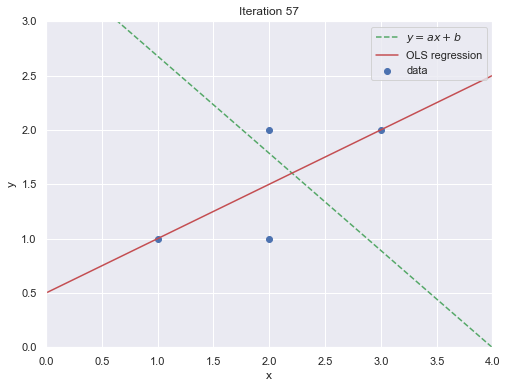

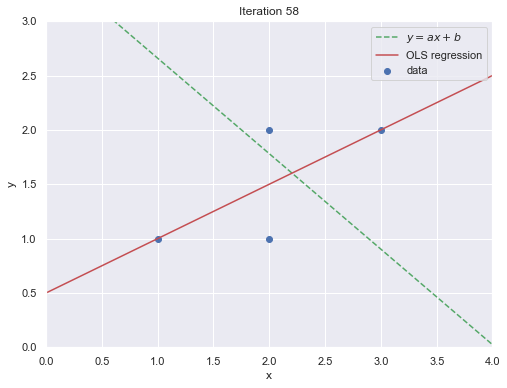

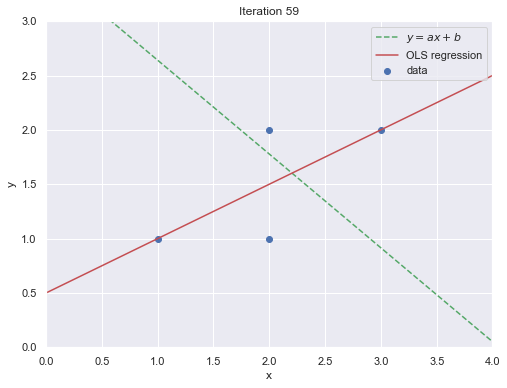

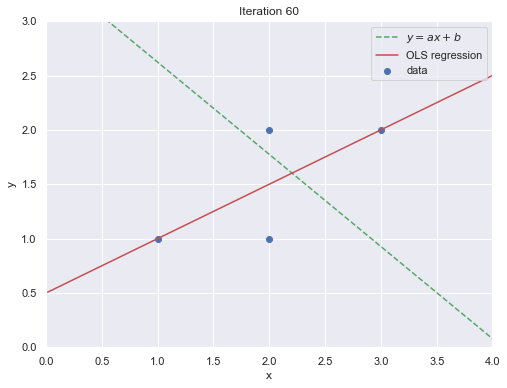

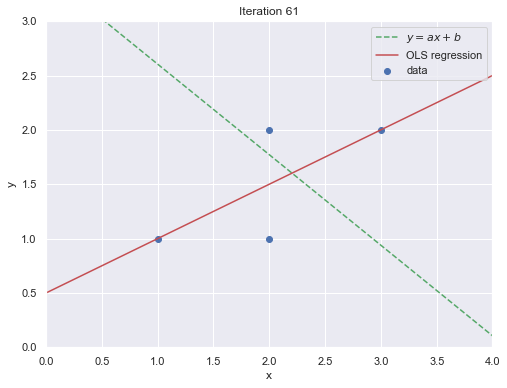

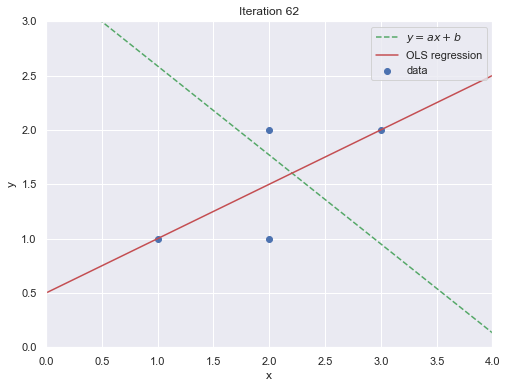

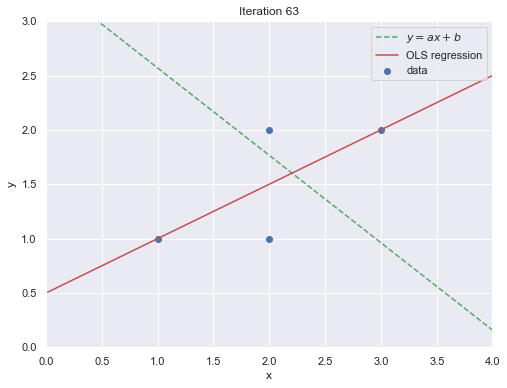

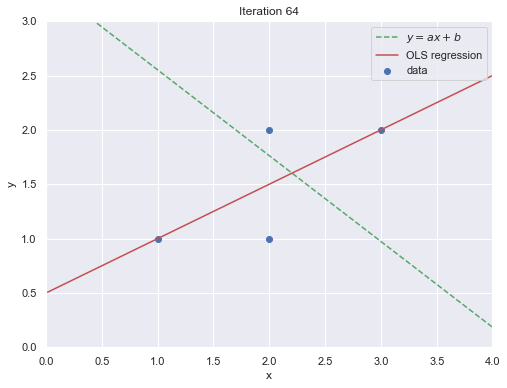

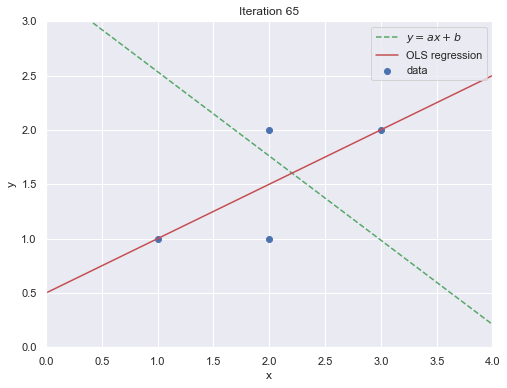

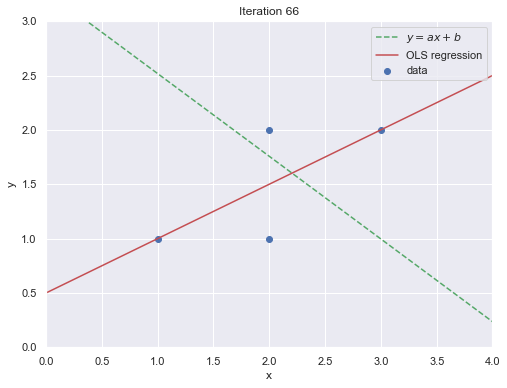

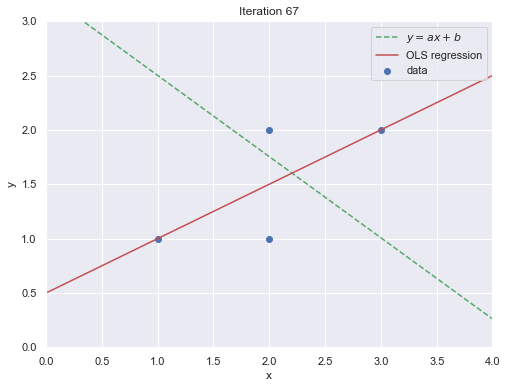

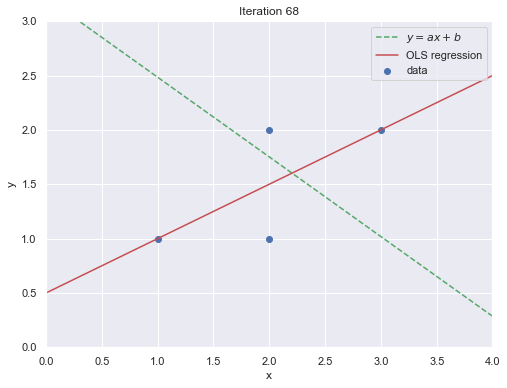

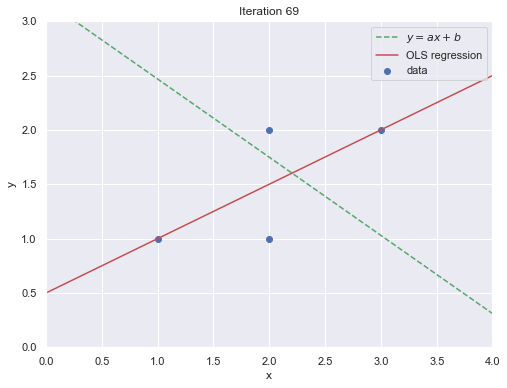

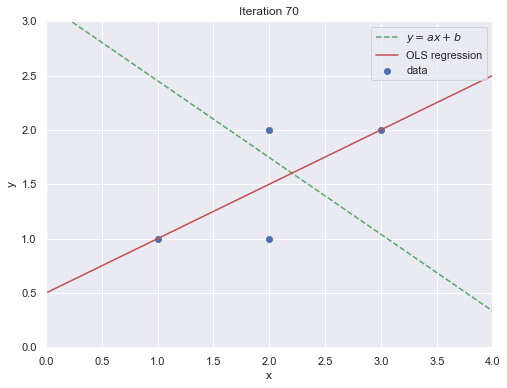

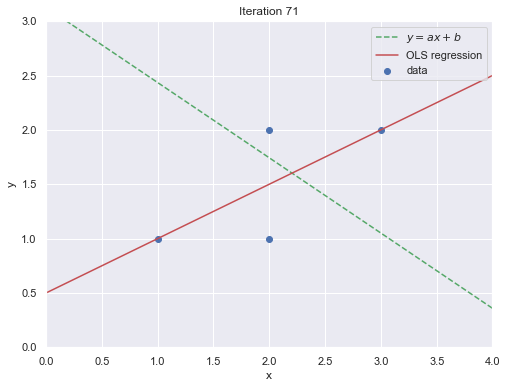

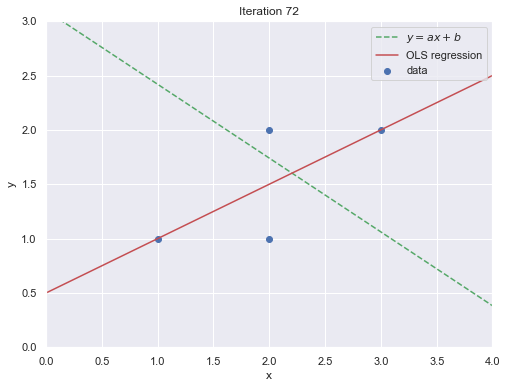

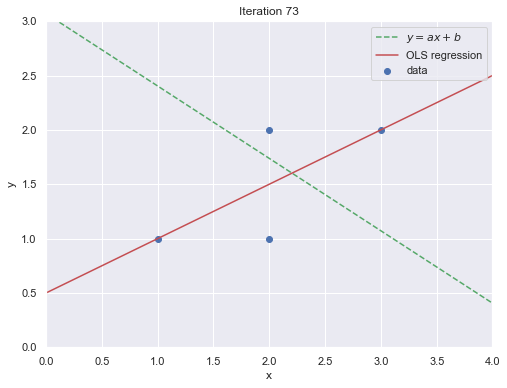

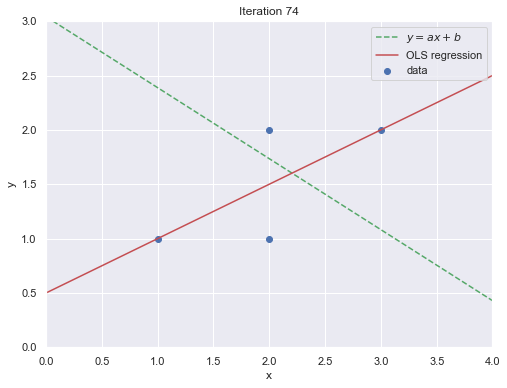

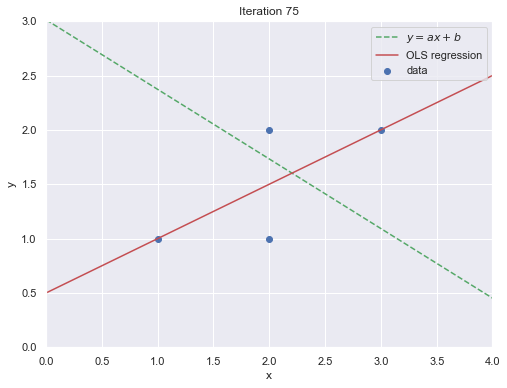

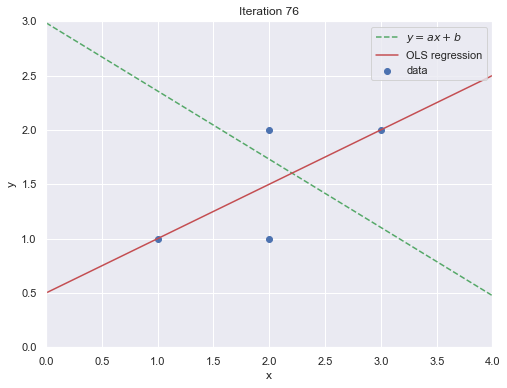

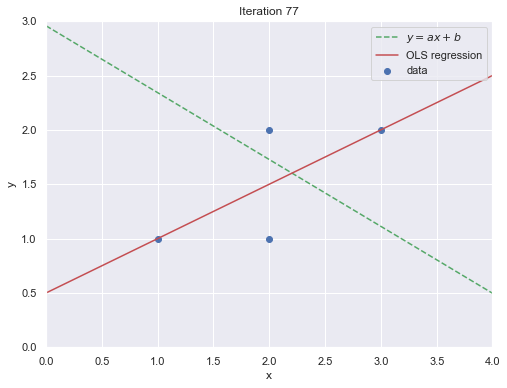

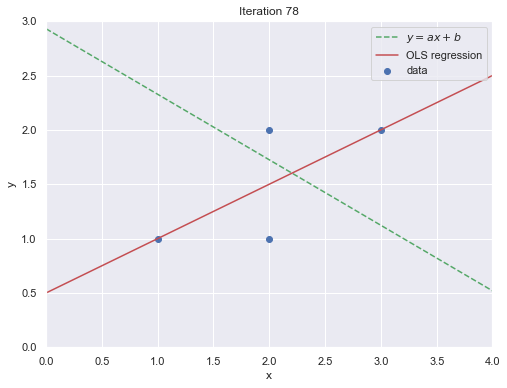

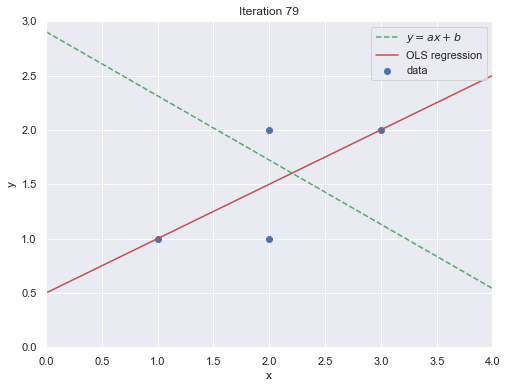

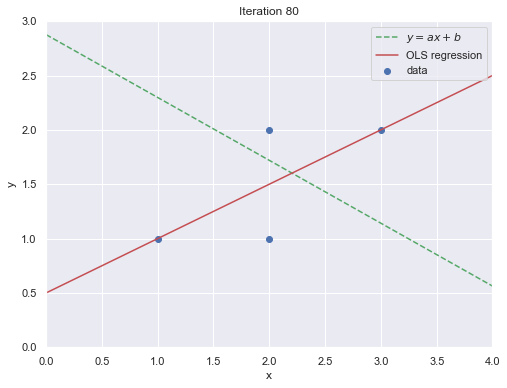

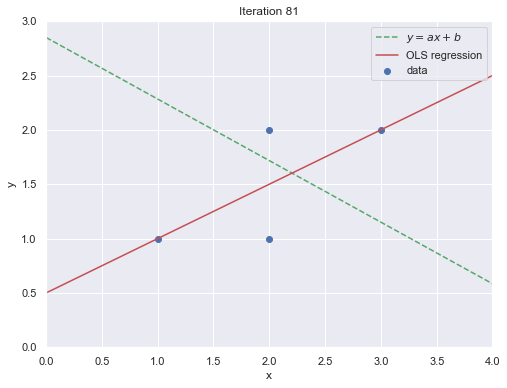

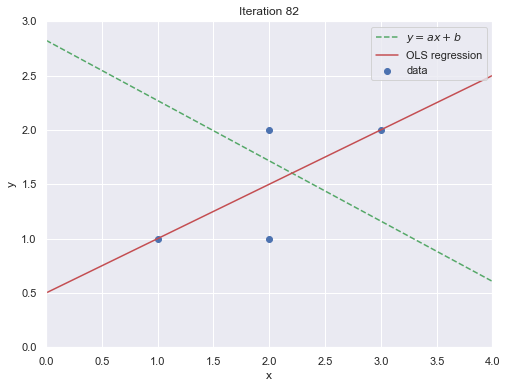

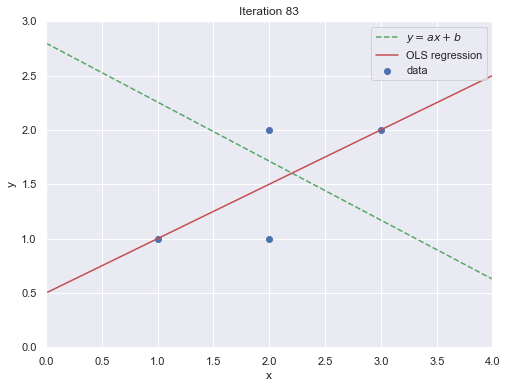

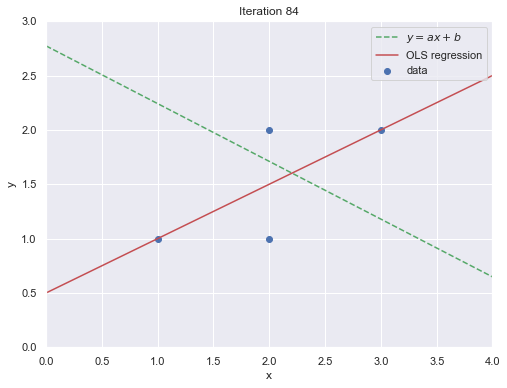

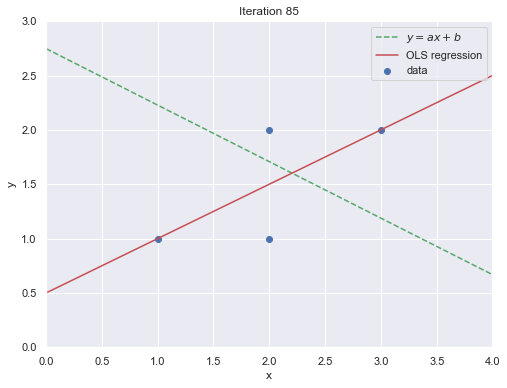

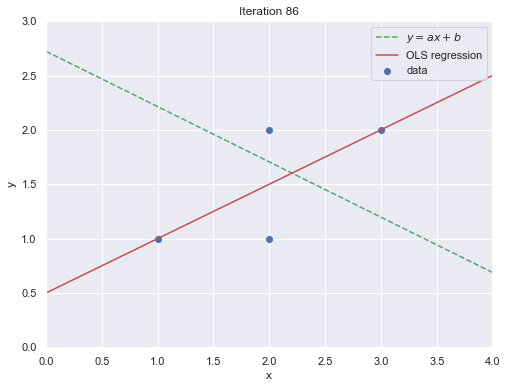

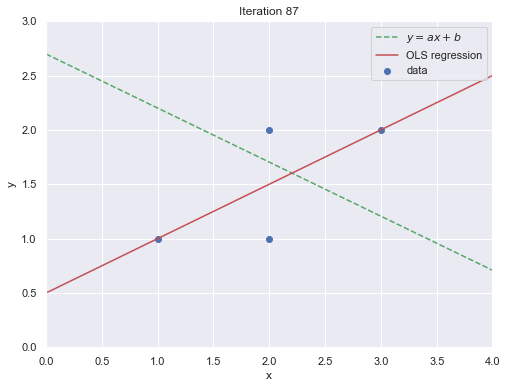

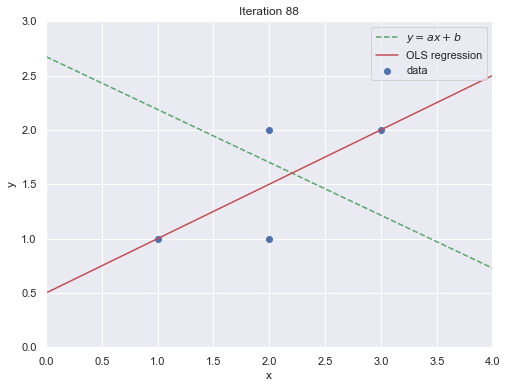

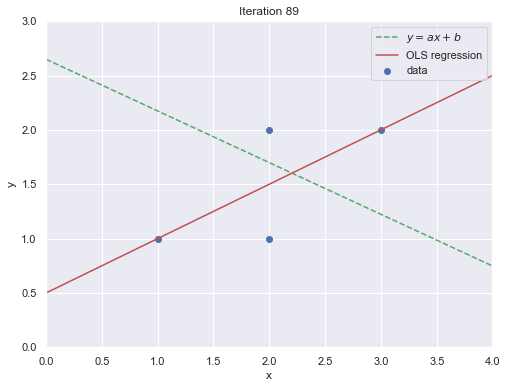

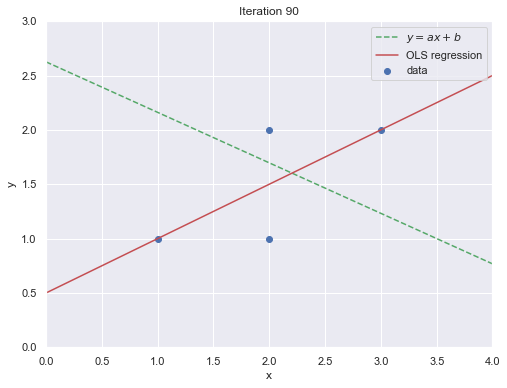

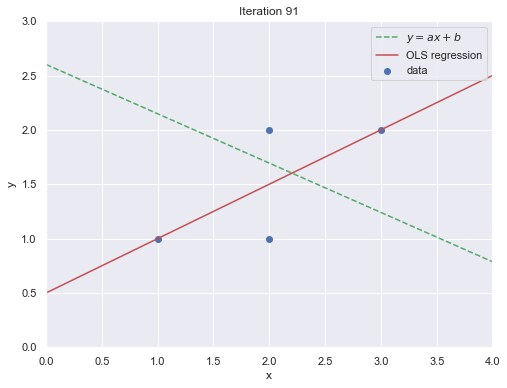

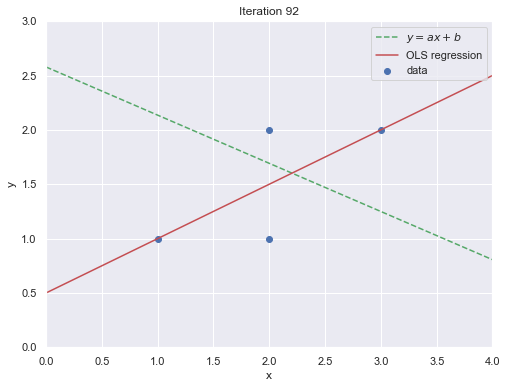

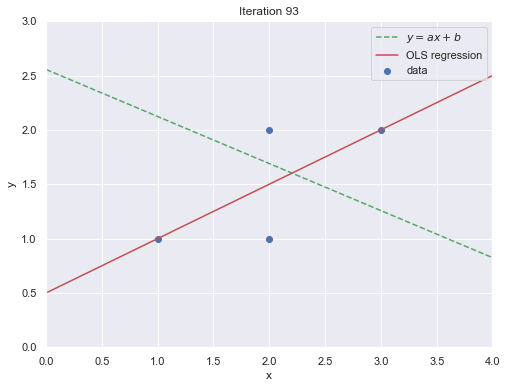

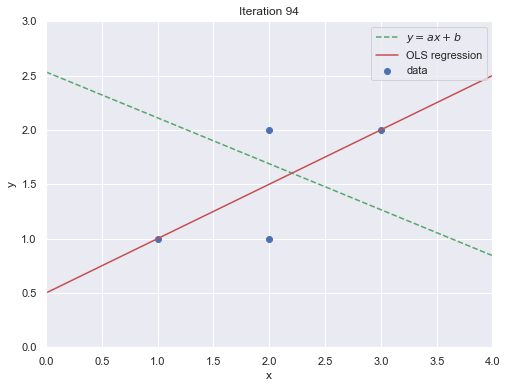

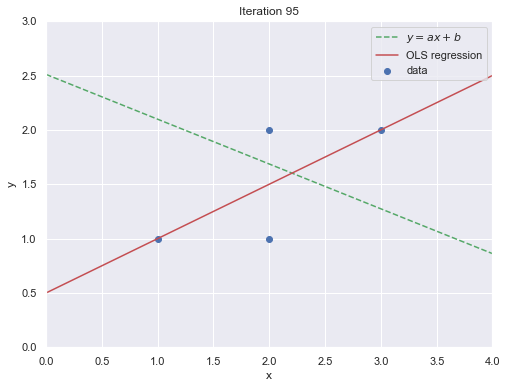

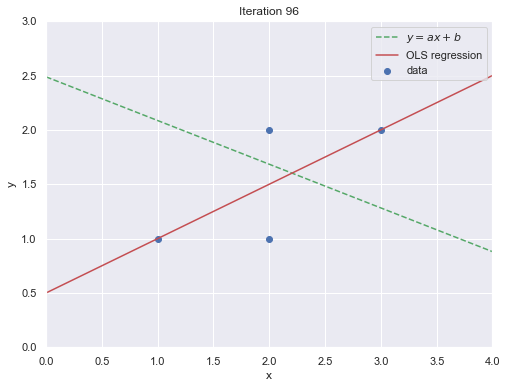

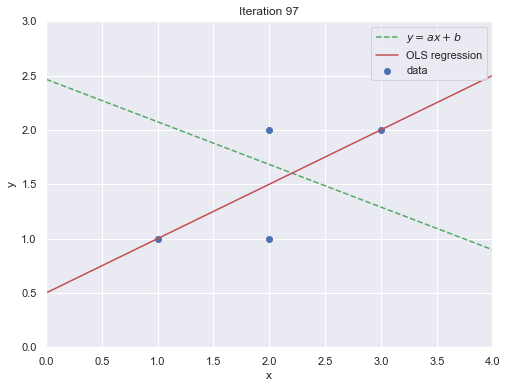

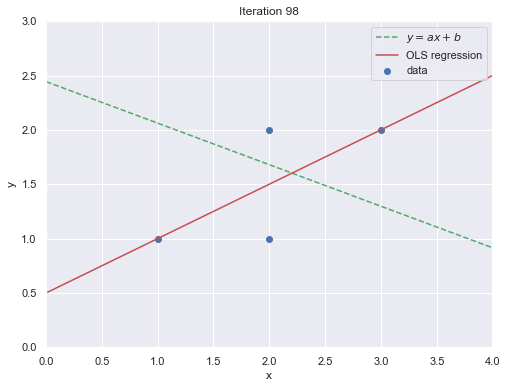

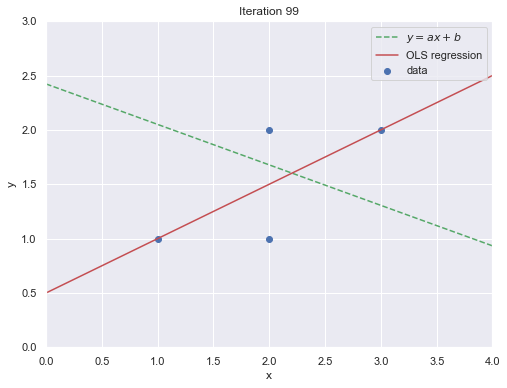

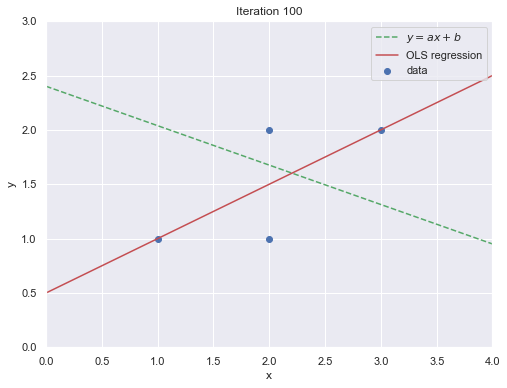

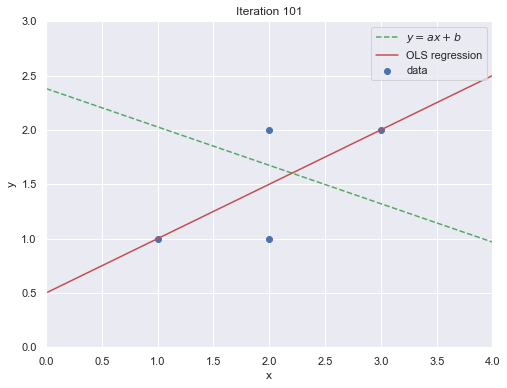

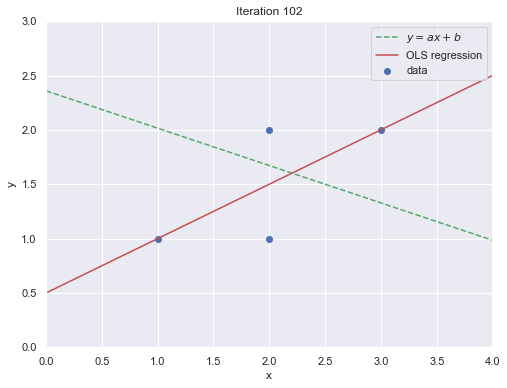

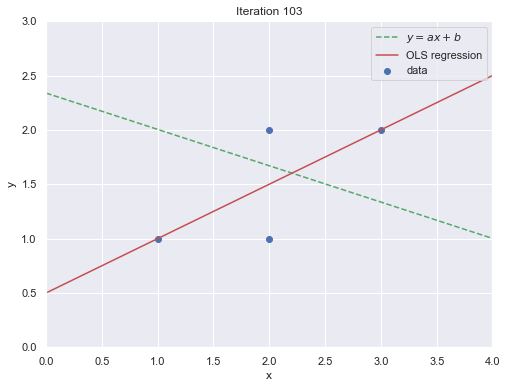

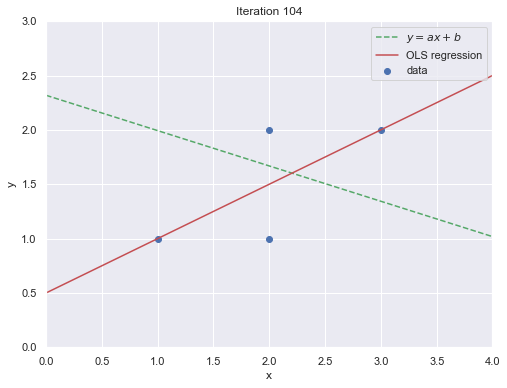

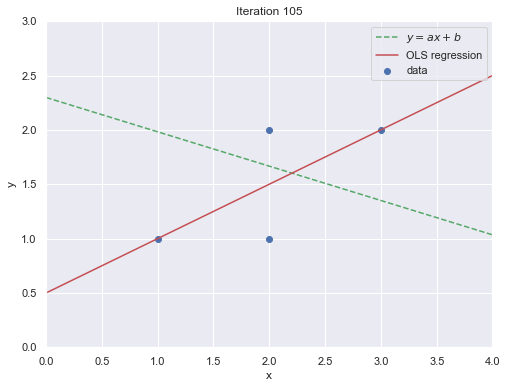

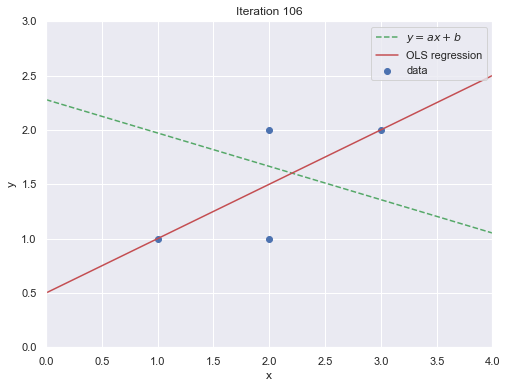

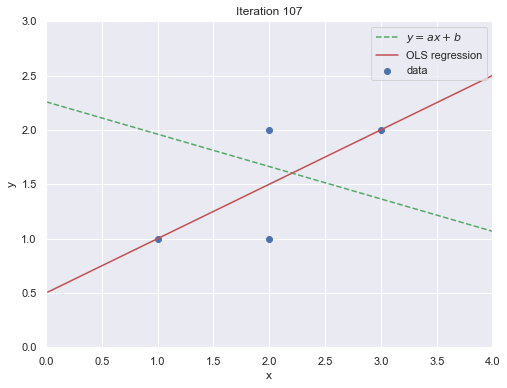

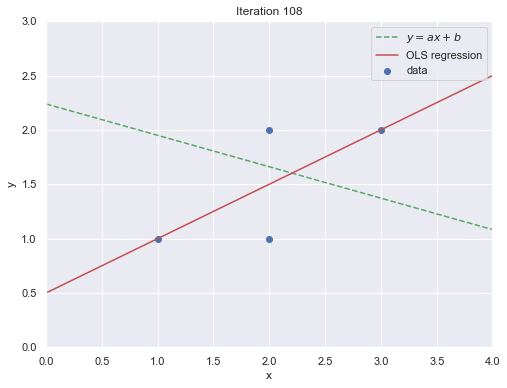

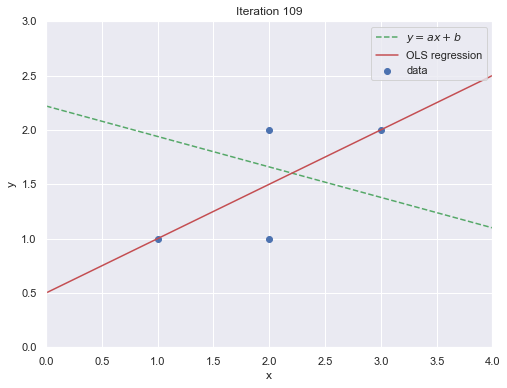

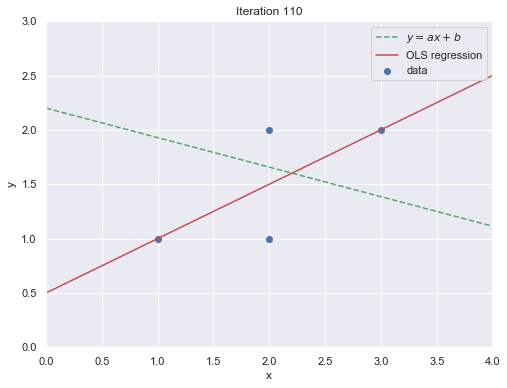

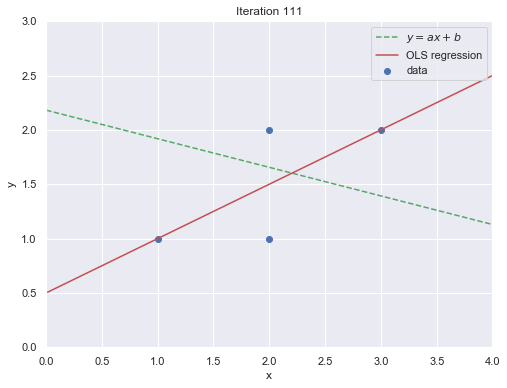

In [ ]:
result = GD([-5,5], 0.015, 0.00001)
print ("Point of minimum: ", (round(result[0][0],2), round(result[0][1],2)), 
       "\nMin = ", round(result[1],2), "\nN iterations = ", result[2])

In [ ]:
import imageio
images = []
filenames = ['./img/it_{}.png'.format(iteration) for iteration in range(1,469)]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images)

### Multinomial Regression

In [43]:
X = [1,3,4,2,5,1,5,6]
Y = [1,2,5,5,3,1,1,2]

In [44]:
x = np.array(X).reshape((-1, 1))
y = np.array(Y)

In [ ]:
x

In [ ]:
y

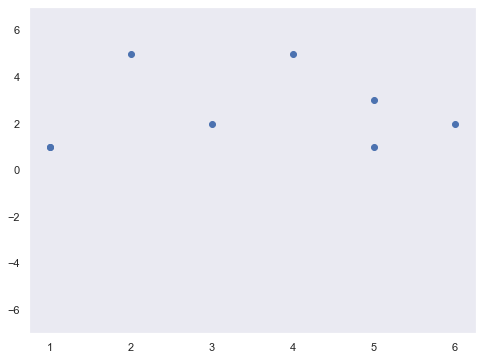

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='b')
plt.ylim([-7,7])
plt.grid()
plt.show()

In [46]:
scores = pd.DataFrame()

In [47]:
model = LinearRegression().fit(x, y)

In [48]:
y_pred_r1 = model.predict(x)

In [49]:
y_pred_r1

array([2.2705314 , 2.46376812, 2.56038647, 2.36714976, 2.65700483,
       2.2705314 , 2.65700483, 2.75362319])

In [50]:
r_sq = model.score(x, y)
r_sq

0.01207729468599028

In [51]:
a = model.coef_
b = model.intercept_

In [ ]:
print(a,b)

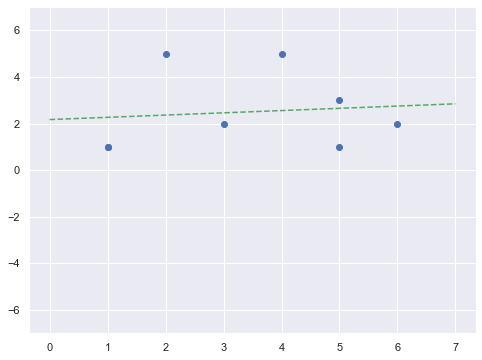

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='b')
x_r1 = np.linspace(0, 7, 10)
y_r1 = a*x_r1 + b
plt.plot(x_r1, y_r1, linestyle='dashed', color='g')
plt.ylim([-7,7])
plt.show()

In [53]:
math.sqrt(mean_squared_error(y, y_pred_r1))

1.5715618865590448

In [54]:
# RMSE
scores = pd.concat([pd.DataFrame({'degree': [1], 'train_rmse':[math.sqrt(mean_squared_error(y, y_pred_r1))]}),scores], axis=0)
scores

,degree,train_rmse
0,1,1.571562


In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [57]:
x_2 = transformer.transform(x)

In [58]:
model2 = LinearRegression().fit(x_2, y)

In [59]:
model2.coef_

array([ 2.63630491, -0.38178295])

In [60]:
model2.intercept_

-0.8139534883720971

In [61]:
a2 = model2.coef_[1]
b2 = model2.coef_[0]
c2 = model2.intercept_

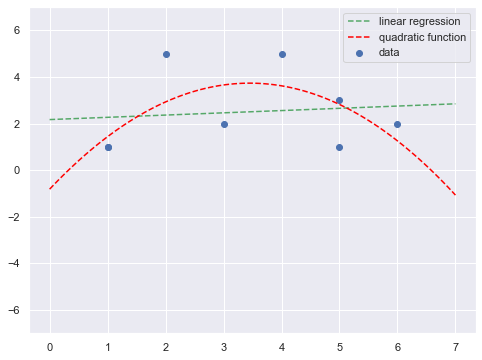

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='b')
x_r2 = np.linspace(0, 7, 100)
y_r2 = a[0]*x_r2+b
y_2 = a2*(x_r2**2) + b2*x_r2 + c2
plt.plot(x_r2, y_r2, linestyle='dashed', color='g')
plt.plot(x_r2, y_2, linestyle='dashed', color='red')
plt.ylim([-7,7])
plt.legend(['linear regression', 'quadratic function', 'data'])
plt.show()

In [63]:
r_sq_2 = model2.score(x_2, y)
r_sq_2

0.33908268733850144

In [64]:
math.sqrt(mean_squared_error(y, model2.predict(x_2)))

1.285415606585569

In [65]:
scores = pd.concat([scores, pd.DataFrame({'degree': [2], 'train_rmse':[math.sqrt(mean_squared_error(y, model2.predict(x_2)))]})],
                   axis=0, ignore_index=True)
scores

,degree,train_rmse
0,1,1.571562
1,2,1.285416


In [66]:
transformer = PolynomialFeatures(degree=5, include_bias=False)
transformer.fit(x)

PolynomialFeatures(degree=5, include_bias=False, interaction_only=False,
                   order='C')

In [67]:
x_5 = transformer.transform(x)

In [ ]:
x_5

In [68]:
model5 = LinearRegression().fit(x_5, y)

In [70]:
model5.coef_

array([ 195.45      , -139.20833333,   45.16666667,   -6.79166667,
          0.38333333])

In [69]:
model5.intercept_

-94.00000000018338

In [71]:
a5 = model5.coef_[4]
b5 = model5.coef_[3]
c5 = model5.coef_[2]
d5 = model5.coef_[1]
e5 = model5.coef_[0]
f5 = model5.intercept_

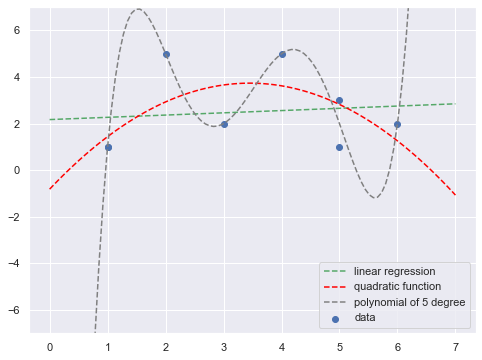

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='b')
x_r5 = np.linspace(0, 7, 100)
y_r5 = a[0]*x_r5+b
y_2 = a2*(x_r5**2) + b2*x_r5 + c2
y_5 = a5*(x_r5**5) + b5*(x_r5**4) + c5*(x_r5**3) + d5*(x_r5**2) + e5*x_r5 + f5
plt.plot(x_r5, y_r5, linestyle='dashed', color='g')
plt.plot(x_r5, y_2, linestyle='dashed', color='red')
plt.plot(x_r5, y_5, linestyle='dashed', color='grey')
plt.legend(['linear regression', 'quadratic function', 'polynomial of 5 degree','data'])
plt.ylim([-7,7])
plt.show()

In [73]:
r_sq_5 = model5.score(x_5, y)
r_sq_5

0.9

In [74]:
math.sqrt(mean_squared_error(y, model5.predict(x_5)))

0.5

In [75]:
scores = pd.concat([scores, pd.DataFrame({'degree': [5], 'train_rmse':[math.sqrt(mean_squared_error(y, model5.predict(x_5)))]})],
                   axis=0, ignore_index=True)
scores

,degree,train_rmse
0,1,1.571562
1,2,1.285416
2,5,0.500000


In [76]:
import statsmodels.api as sm

In [77]:
x_stat = x.copy()
x_stat = sm.add_constant(x)

In [78]:
model_stat = sm.OLS(y,x_stat)

In [79]:
results = model_stat.fit()

In [80]:
results.summary()

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.153
Method:                 Least Squares   F-statistic:                   0.07335
Date:                Sat, 07 Dec 2019   Prob (F-statistic):              0.796
Time:                        12:57:46   Log-Likelihood:                -14.968
No. Observations:                   8   AIC:                             33.94
Df Residuals:                       6   BIC:                             34.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1739      1.364      1.593      0.162      -1.164       5.512
x1             0.0966      0.357      0.271      0.796      -0.776       0.970
==============================================================================
Omnibus:                        1.781   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.119
Skew:                           0.761   Prob(JB):                        0.571
Kurtosis:                       1.980   Cond. No.                         8.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model_r = Ridge(alpha=10).fit(x_5, y)

In [82]:
model_r.coef_

array([ 0.0850157 ,  0.19207293,  0.2359394 , -0.09990567,  0.00922221])

In [83]:
model_r.intercept_

1.2414899433480926

In [84]:
ar = model_r.coef_[4]
br = model_r.coef_[3]
cr = model_r.coef_[2]
dr = model_r.coef_[1]
er = model_r.coef_[0]
fr = model_r.intercept_

In [85]:
model_l = Lasso(alpha=10).fit(x_5, y)

In [86]:
model_l.coef_

array([ 0.        ,  0.        ,  0.        ,  0.00171467, -0.00037396])

In [87]:
model_l.intercept_

2.5946849587343426

In [88]:
al = model_l.coef_[4]
bl = model_l.coef_[3]
cl = model_l.coef_[2]
dl = model_l.coef_[1]
el = model_l.coef_[0]
fl = model_l.intercept_

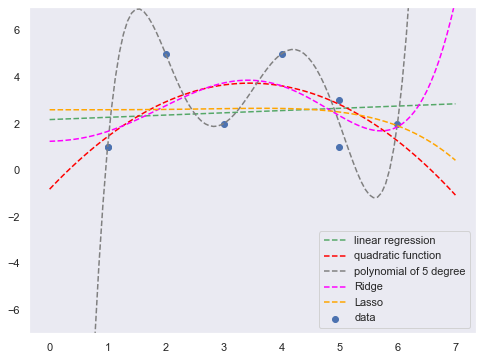

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='b')
x_r5 = np.linspace(0, 7, 100)
y_r5 = a[0]*x_r5+b
y_2 = a2*(x_r5**2) + b2*x_r5 + c2
y_5 = a5*(x_r5**5) + b5*(x_r5**4) + c5*(x_r5**3) + d5*(x_r5**2) + e5*x_r5 + f5
y_r = ar*(x_r5**5) + br*(x_r5**4) + cr*(x_r5**3) + dr*(x_r5**2) + er*x_r5 + fr
y_l = al*(x_r5**5) + bl*(x_r5**4) + cl*(x_r5**3) + dl*(x_r5**2) + el*x_r5 + fl
plt.plot(x_r5, y_r5, linestyle='dashed', color='g')
plt.plot(x_r5, y_2, linestyle='dashed', color='red')
plt.plot(x_r5, y_5, linestyle='dashed', color='grey')
plt.plot(x_r5, y_r, linestyle='dashed', color='magenta')
plt.plot(x_r5, y_l, linestyle='dashed', color='orange')
plt.legend(['linear regression', 'quadratic function', 'polynomial of 5 degree','Ridge', 'Lasso','data'])
plt.ylim([-7,7])
plt.grid()
plt.show()

In [90]:
r_sq_r = model_r.score(x_5, y)
r_sq_r

0.3465154822063463

In [91]:
x_test = np.array([1, 3, 6.5]).reshape(-1,1)
y_test = np.array([4, 6, -2])

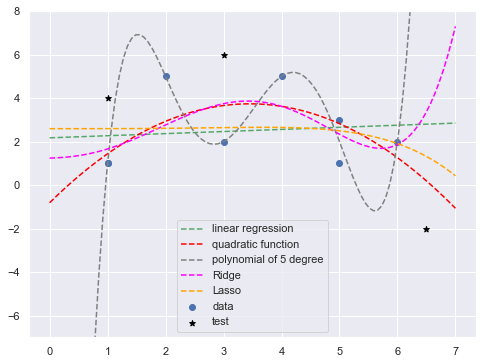

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
x_r5 = np.linspace(0, 7, 100)
y_r5 = a[0]*x_r5+b
y_2 = a2*(x_r5**2) + b2*x_r5 + c2
y_5 = a5*(x_r5**5) + b5*(x_r5**4) + c5*(x_r5**3) + d5*(x_r5**2) + e5*x_r5 + f5
y_r = ar*(x_r5**5) + br*(x_r5**4) + cr*(x_r5**3) + dr*(x_r5**2) + er*x_r5 + fr
y_l = al*(x_r5**5) + bl*(x_r5**4) + cl*(x_r5**3) + dl*(x_r5**2) + el*x_r5 + fl
plt.plot(x_r5, y_r5, linestyle='dashed', color='g')
plt.plot(x_r5, y_2, linestyle='dashed', color='red')
plt.plot(x_r5, y_5, linestyle='dashed', color='grey')
plt.plot(x_r5, y_r, linestyle='dashed', color='magenta')
plt.plot(x_r5, y_l, linestyle='dashed', color='orange')
plt.legend(['linear regression', 'quadratic function', 'polynomial of 5 degree','Ridge', 'Lasso','data', 'test'])
plt.ylim([-7,8])
plt.show()

### Problem

1) In a loop find _train_ and _test_ _**rmse**_ for the data and train_data defined above.  
2) Draw a graph of _train_ vs _test_ _**rmse**_ with complexity of model (polynomial degree) as independent variable.  
3) Fit Ridge, Lasso and ElasticNet regression and compare results.  
4) Make conclusions.  
See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html  

In [93]:
res = pd.DataFrame()
for i in range(1,6):
    transformer = PolynomialFeatures(degree=i, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_t = transformer.transform(x_test)
    for Name, Regressor in {'lr' : LinearRegression(), 'ridge': Ridge(alpha=10), 'lasso': Lasso(alpha=10),
                           'elasticnet': ElasticNet(l1_ratio=0.5)}.items():
        model = Regressor.fit(x_, y)
        train_pr = model.predict(x_)
        test_pr = model.predict(x_t)
        res = pd.concat([res, pd.DataFrame({'complexity': [i], 'train_rmse': [math.sqrt(mean_squared_error(y, train_pr))],
                                           'test_rmse': [math.sqrt(mean_squared_error(y_test,test_pr))],
                                           'model':[Name]})], ignore_index=True)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0050317111646940305, tolerance: 0.002
  positive)
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.53594960866247, tolerance: 0.002
  positive)


In [ ]:
res

In [94]:
def plot_rmse(res=res, mod='lr'):
    plt.figure(figsize=(8,6))
    plt.plot(res[res.model == mod].complexity.values, res[res.model == mod].train_rmse.values, '-ok', color='b')
    plt.plot(res[res.model == mod].complexity.values, res[res.model == mod].test_rmse.values, '-ok', color='r')
    plt.ylim([0,10])
    plt.xlabel('Polynomial degree')
    plt.ylabel('RMSE')
    plt.legend(['train', 'test'])
    plt.title('Perfomance of the {} on train and test data'.format(mod.upper()))
    plt.grid()
    plt.show()

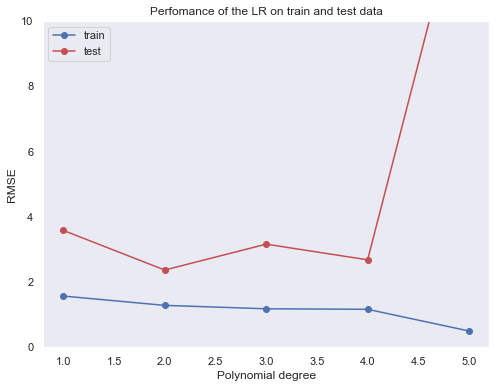

In [95]:
plot_rmse()

In [ ]:
plot_rmse(mod='ridge')

In [ ]:
plot_rmse(mod='lasso')

In [ ]:
plot_rmse(mod='elasticnet')

### K-nearest Neighbours

In [96]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2) # 2 neighbours = 2 points
neigh.fit(x, y) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [97]:
test_pr_knn = neigh.predict(x_test)
train_knn = neigh.predict(x)

In [98]:
math.sqrt(mean_squared_error(y_test,test_pr_knn))

3.4399612400917157

In [99]:
math.sqrt(mean_squared_error(y,train_knn))

1.159202311936963

In [100]:
res_knn = pd.DataFrame()
for i in range(1,5):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x, y) 
    train_pr = model.predict(x)
    test_pr = model.predict(x_test)
    res_knn = pd.concat([res_knn, pd.DataFrame({'k': [i], 'train_rmse': [math.sqrt(mean_squared_error(y, train_pr))],
                                        'test_rmse': [math.sqrt(mean_squared_error(y_test,test_pr))]})], ignore_index=True)

In [101]:
res_knn

,k,train_rmse,test_rmse
0,1,0.707107,3.696846
1,2,1.159202,3.439961
2,3,1.572330,2.755466
3,4,1.620185,3.326034


In [102]:
x_linsp = np.linspace(0,7,100).reshape(-1,1)
model1 = KNeighborsRegressor(n_neighbors=1).fit(x,y)
y_knn_1 = model1.predict(x_linsp)
model2 = KNeighborsRegressor(n_neighbors=2).fit(x,y)
y_knn_2 = model2.predict(x_linsp)
model3 = KNeighborsRegressor(n_neighbors=3).fit(x,y)
y_knn_3 = model3.predict(x_linsp)
model4 = KNeighborsRegressor(n_neighbors=4).fit(x,y)
y_knn_4 = model4.predict(x_linsp)

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
x_knn = np.linspace(0, 7, 100)
plt.plot(x_knn, y_knn_1, linestyle='dashed', color='orange')
plt.plot(x_knn, y_knn_2, linestyle='dashed', color='green')
plt.plot(x_knn, y_knn_3, linestyle='dashed', color='red')
plt.plot(x_knn, y_knn_4, linestyle='dashed', color='grey')
plt.legend(['knn-1', 'knn-2', 'knn-3', 'knn-4', 'data', 'test'])
plt.ylim([-5,8])
plt.grid()
plt.show()

NameError: name 'X' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(res_knn.k.values, res_knn.train_rmse.values, '-ok', color='b')
plt.plot(res_knn.k.values, res_knn.test_rmse.values, '-ok', color='r')
plt.ylim([0,5])
plt.xlabel('# of neighbors (k)')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])
plt.title('Perfomance of the KNN on train and test data')
plt.show()

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(x, y)
test_pred = dt.predict(x_test)
train_pred = dt.predict(x)
print('rmse on train', math.sqrt(mean_squared_error(y, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 0.3535533905932738
rmse on test 3.696845502136472


In [33]:
x_linsp = np.linspace(0,7,100).reshape(-1,1)
model1 = DecisionTreeRegressor(max_depth=2).fit(x,y)
y_dt_1 = model1.predict(x_linsp)
model2 = DecisionTreeRegressor(max_depth=3).fit(x,y)
y_dt_2 = model2.predict(x_linsp)
model3 = DecisionTreeRegressor(max_depth=4).fit(x,y)
y_dt_3 = model3.predict(x_linsp)

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
x_dt = np.linspace(0, 7, 100)
plt.plot(x_dt, y_dt_1, linestyle='dashed', color='orange')
plt.plot(x_dt, y_dt_2, linestyle='dashed', color='green')
plt.plot(x_dt, y_dt_3, linestyle='dashed', color='red')
plt.legend(['max_depth=2', 'max_depth=3', 'max_depth=4', 'data', 'test'])
plt.ylim([-5,8])
plt.show()

NameError: name 'X' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:
res_dt = pd.DataFrame()
for i in range(1,5):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(x, y) 
    train_pr = model.predict(x)
    test_pr = model.predict(x_test)
    res_dt = pd.concat([res_dt, pd.DataFrame({'max_depth': [i], 'train_rmse': [math.sqrt(mean_squared_error(y, train_pr))],
                                        'test_rmse': [math.sqrt(mean_squared_error(y_test,test_pr))]})], ignore_index=True)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(res_dt.max_depth.values, res_dt.train_rmse.values, '-ok', color='b')
plt.plot(res_dt.max_depth.values, res_dt.test_rmse.values, '-ok', color='r')
plt.ylim([0,5])
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])
plt.title('Perfomance of the DT on train and test data')
plt.show()

### Random forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf = RandomForestRegressor(n_estimators=6, random_state=40)
rf.fit(x, y)
test_pred = rf.predict(x_test)
train_pred = rf.predict(x)
print('rmse on train', math.sqrt(mean_squared_error(y, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

rmse on train 0.9767256808109203
rmse on test 2.9658550700086974


In [105]:
rf1 = RandomForestRegressor(n_estimators=4, max_depth=3).fit(x,y)
y_rf_1 = rf1.predict(x_linsp)
rf2 = RandomForestRegressor(n_estimators=5, max_depth=3).fit(x,y)
y_rf_2 = rf2.predict(x_linsp)
rf3 = RandomForestRegressor(n_estimators=6, max_depth=3).fit(x,y)
y_rf_3 = rf3.predict(x_linsp)

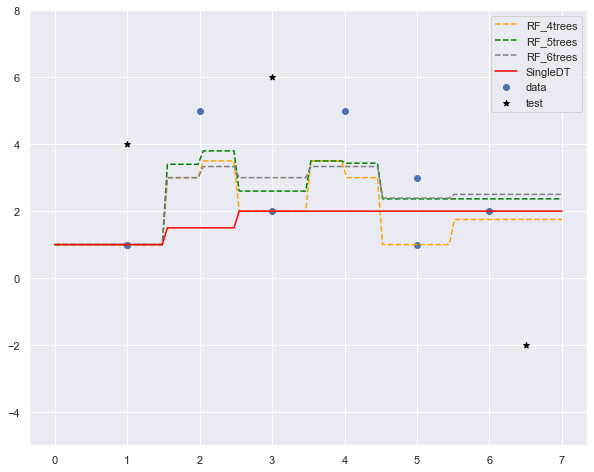

In [106]:
plt.figure(figsize=(10,8))
plt.scatter(X,Y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
x_ = np.linspace(0, 7, 100)
plt.plot(x_, y_rf_1, linestyle='dashed', color='orange')
plt.plot(x_, y_rf_2, linestyle='dashed', color='green')
plt.plot(x_, y_rf_3, linestyle='dashed', color='grey')
plt.plot(x_, y_dt_2, linestyle='-', color='red')
plt.legend(['RF_4trees', 'RF_5trees', 'RF_6trees', 'SingleDT', 'data', 'test'])
plt.ylim([-5,8])
plt.show()

In [107]:
res_rf = pd.DataFrame()
for i in (3,5,8,10,20):
    model = RandomForestRegressor(n_estimators=i)
    model.fit(x, y) 
    train_pr = model.predict(x)
    test_pr = model.predict(x_test)
    res_rf = pd.concat([res_rf, pd.DataFrame({'n_estimators': [i], 'train_rmse': [math.sqrt(mean_squared_error(y, train_pr))],
                                        'test_rmse': [math.sqrt(mean_squared_error(y_test,test_pr))]})], ignore_index=True)

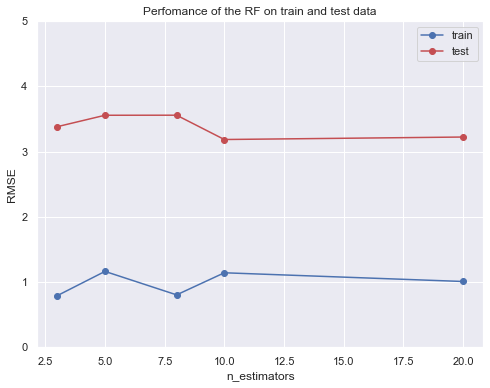

In [108]:
plt.figure(figsize=(8,6))
plt.plot(res_rf.n_estimators.values, res_rf.train_rmse.values, '-ok', color='b')
plt.plot(res_rf.n_estimators.values, res_rf.test_rmse.values, '-ok', color='r')
plt.ylim([0,5])
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])
plt.title('Perfomance of the RF on train and test data')
plt.show()

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.02, max_depth=2)
gbr.fit(x, y)
test_pred = gbr.predict(x_test)
train_pred = gbr.predict(x)
print('rmse on train', math.sqrt(mean_squared_error(y, train_pred)))
print('rmse on test', math.sqrt(mean_squared_error(y_test, test_pred)))

In [ ]:
gbr1 =  GradientBoostingRegressor(n_estimators=5, max_depth=2).fit(x,y)
y_gbr_1 = gbr1.predict(x_linsp)
gbr2 =  GradientBoostingRegressor(n_estimators=10, max_depth=2).fit(x,y)
y_gbr_2 = gbr2.predict(x_linsp)
gbr3 =  GradientBoostingRegressor(n_estimators=20, max_depth=2).fit(x,y)
y_gbr_3 = gbr3.predict(x_linsp)
gbr4 =  GradientBoostingRegressor(n_estimators=50, max_depth=2).fit(x,y)
y_gbr_4 = gbr4.predict(x_linsp)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color='b')
plt.scatter(x_test, y_test, color='black', marker='*')
x_ = np.linspace(0, 7, 100)
plt.plot(x_, y_gbr_1, linestyle='dashed', color='orange')
plt.plot(x_, y_gbr_2, linestyle='dashed', color='green')
plt.plot(x_, y_gbr_3, linestyle='dashed', color='grey')
plt.plot(x_, y_gbr_4, linestyle='dashed', color='red')
plt.legend(['5 estimators', '10 estimators', '20 estimators', '50 estimators', 'data', 'test'])
plt.ylim([-5,8])
plt.show()

In [ ]:
res_gb = pd.DataFrame()
for i in (3,5,8,15,20,40,60):
    model = GradientBoostingRegressor(n_estimators=i)
    model.fit(x, y) 
    train_pr = model.predict(x)
    test_pr = model.predict(x_test)
    res_gb = pd.concat([res_gb, pd.DataFrame({'n_estimators': [i], 'train_rmse': [math.sqrt(mean_squared_error(y, train_pr))],
                                        'test_rmse': [math.sqrt(mean_squared_error(y_test,test_pr))]})], ignore_index=True)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(res_gb.n_estimators.values, res_gb.train_rmse.values, '-ok', color='b')
plt.plot(res_gb.n_estimators.values, res_gb.test_rmse.values, '-ok', color='r')
plt.ylim([0,5])
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.legend(['train', 'test'])
plt.title('Perfomance of the GB on train and test data')
plt.show()